# Eerste demo Lloyd's algoritme

- Auteur: Jimmy Bierenbroodspot
- Datum: 17 juni 2024
- Locatie: Hogeschool Utrecht

In [2]:
import sys
sys.path.append("../")

import numpy as np
import numpy.typing as npt
from matplotlib import pyplot as plt
import pypdf

from src.algorithm.clustering import ClusteringModel

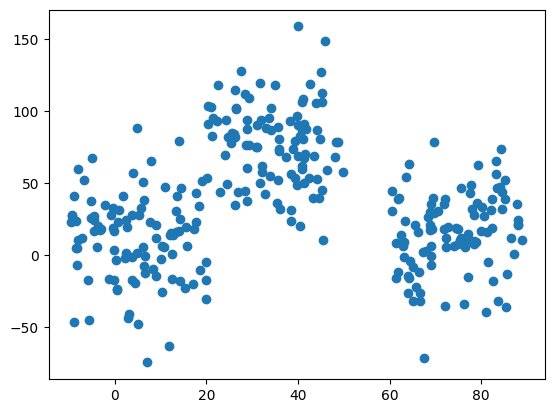

In [3]:
center_one: tuple[int, int] = (-10, 15)
center_two: tuple[int, int] = (20, 80)
center_three: tuple[int, int] = (60, 10)
distance: int = 30

demo_dataset: npt.NDArray[np.int64] = np.array([
    [
        *np.random.uniform(center_one[0], center_one[0] + distance, size=(100,)),
        *np.random.uniform(center_two[0], center_two[0] + distance, size=(100,)),
        *np.random.uniform(center_three[0], center_three[0] + distance, size=(100,)),
    ],
    [
        *np.random.normal(center_one[1], distance, size=(100,)),
        *np.random.normal(center_two[1], distance, size=(100,)),
        *np.random.normal(center_three[1], distance, size=(100,)),
    ],
]).T

plt.scatter(x=demo_dataset[:,0], y=demo_dataset[:,1]) # type: ignore

plt.show() # type: ignore

In [4]:
model: ClusteringModel[np.int64] = ClusteringModel(demo_dataset, 3, "lloyds")
model.train(demo_dataset)

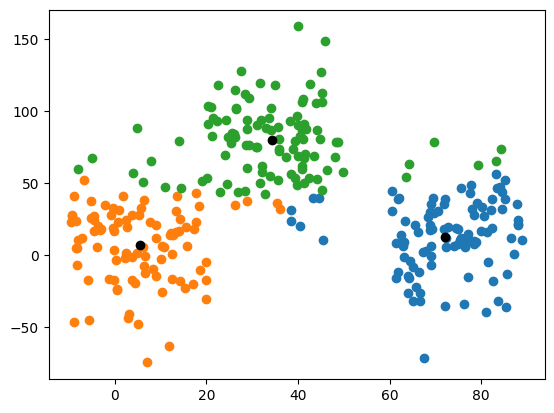

In [5]:
for cluster in range(model.num_clusters):
    subset: npt.NDArray[np.int64] = demo_dataset[
        model.closest_centers == cluster
    ].T

    plt.scatter(*subset) # type: ignore

plt.scatter(*model.cluster_centers.T, color="black") # type: ignore

plt.show() # type: ignore

In [6]:
pdf_reader: pypdf.PdfReader = pypdf.PdfReader("../pdf/voorbeeld_aicv_cv.pdf")
pdf_text: str = pdf_reader.pages[0].extract_text(extraction_mode="layout")
print(pdf_text)

          DRIE TREFWOORDEN +                                                                        ERVARING
    PERSOONSOMSCHRIJVING                                                                            F   u   n   ctietitel + b   ij + Bed   rijf
               Re   g   io    [WOONPL   AATS]                                                       sta   rtma   a   n   d    sta   rtja   a   r - e   in   d   ma   a   n   d    e   in   d   ja   a   r
                                                                                                    [Me   e   st e   ffe   ctie   ve    zin    va   n    h   e   t h   e   le    CV, ko   rt, kra   ch   tig   , h   e   e   l
                                                                                                    e   rg    p   a   sse   n   d    b   ij d   e    va   ca   tu   re   .]
                                 DRI   VE                                                           F   u   n   ctietiel + b   ij + Bed   rijf
    [TE

In [7]:
num_lines: int = len(pdf_text.splitlines()) + 1
print("Het voorbeeldbestand heeft", num_lines, "aantal regels.")

Het voorbeeldbestand heeft 57 aantal regels.


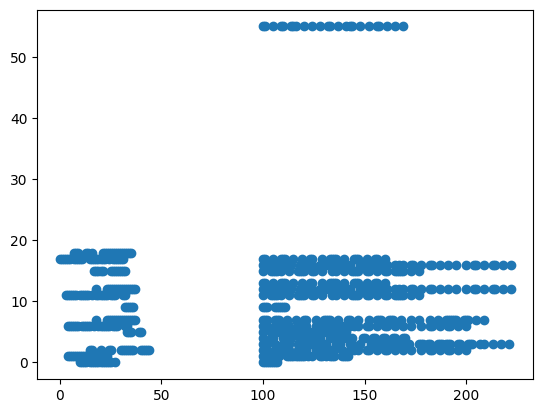

In [10]:
character_position_list: list[tuple[int, int]] = []

for y, line in enumerate(pdf_text.splitlines()):
    for x, char in enumerate(line):
        if not char.isspace():
            character_position_list.append((x, y))

character_positions: npt.NDArray[np.int64] = np.array(character_position_list)

plt.scatter(x=character_positions[:,0], y=character_positions[:,1]) # type: ignore

plt.show() # type: ignore

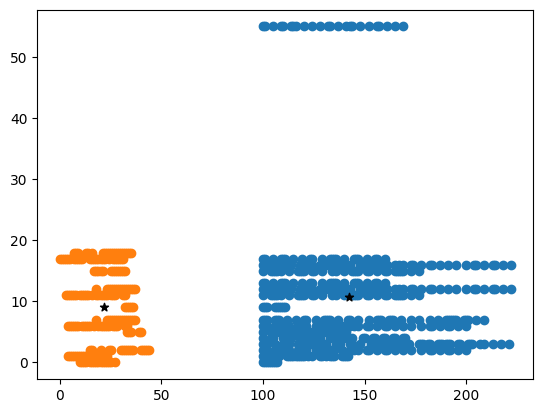

In [9]:
model = ClusteringModel(character_positions, 2, "lloyds")
model.train(character_positions)
plt.scatter(*character_positions[model.closest_centers == 0].T) # type: ignore
plt.scatter(*character_positions[model.closest_centers == 1].T) # type: ignore
plt.scatter(*model.cluster_centers.T, color="black", marker="*") # type: ignore
plt.show() # type: ignore